# Implementing Linear Regression in Python
## Simple Linear Regression w/ Scikit-learn

In [1]:
# importing packages and classes

from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# provide data

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [4]:
# Creating a model and fit it

model = LinearRegression()

In [5]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [6]:
model = LinearRegression().fit(x, y)

In [7]:
# Get the Results

## use the .score() to get coefficient of determination (R)²

r_sq = model.score(x,y)
print('R² = ', r_sq)

R² =  0.7158756137479542


In [8]:
## use the .intercept_ to get the 𝑏₀
## use the .coef_ to get the 𝑏₁

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


The value of 𝑏₀ = 5.63 (approximately) indicates that our model predicts a 5.63 response when 𝑥 is zero. The value of 𝑏₁ = 0.54 means that the predicted response increases by 0.54 when 𝑥 increases by one.

In [9]:
## we can also set y as the two dimensional array
## in this case we can get the same results as before

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [5.63333333]
slope: [[0.54]]


In [10]:
# Predict the Response

## use .predict() to get response that we predict

y_pred = model.predict(x)
print('predicted response : ', y_pred, sep='\n')

predicted response : 
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


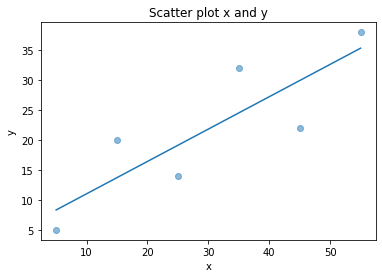

In [11]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

When implementing .predict(), we pass the regressor as an argument and get the corresponding response prediction

In [12]:
## another way to predict the response

y_pred = model.intercept_ + model.coef_ * x
print('predicted response : ', y_pred, sep='\n')

predicted response : 
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


The output here differs from the previous example only in dimensions. The predicted response is now a two-dimensional array, whereas in the previous case, it was one-dimensional.

If we reduce the number of x dimensions to one, both approaches will yield the same result. We can do this by replacing x with x.reshape(-1), x.flatten(), or x.ravel() when multiplying by model.coef_.

In a practice, regression models are often applied to forecasts. This means we can use a pre-fitted model to calculate the output based on some other new input

In [13]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


## Multiple Linear Regression With Scikit-learn

In [14]:
## import packages and classes that is needed

import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [15]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [16]:
## Create model and fit it in

model = LinearRegression().fit(x, y)

In [17]:
## Get the results

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [18]:
## or  we can do this

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [19]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [20]:
## applying current model to the new data

x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial Regression with Scikit-learn

In [24]:
## import packages and classes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [30]:
## Provide data

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


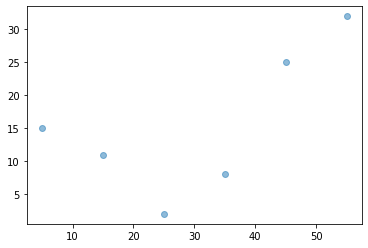

In [31]:
plt.scatter(x, y, alpha=0.5)

In [32]:
## Make instance from its classes

transformer = PolynomialFeatures(degree=2, include_bias=False)

In [33]:
## Transform input data

transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [34]:
## use .transform() to transform the input array

x_ = transformer.transform(x)

In [35]:
## we can also use .fit_transform()

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [36]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [37]:
## Create a model and fit it

model = LinearRegression().fit(x_, y)

In [38]:
## Get the results

r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


We can get very similar results with different transformation and regression arguments

In [39]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [40]:
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


The first column x_ contains one, the second column has the value x, and the third column contains the square of x.

In [41]:
## intercept is already included with the leftmost column of one,
## and we don't need to include it again when instantiating LinearRegression.
## So, we can pass fit_intercept=False.

model = LinearRegression(fit_intercept=False).fit(x_, y)

In [42]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]


In [44]:
## Predict the response

y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


##### We can apply the same procedure if we have multiple input variables. We are going to create an input array with more than one column, but everything else is the same

In [45]:
# Step 1: Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

In [46]:
print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.945370144912782
intercept: 0.8430556452396729
coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


## Advanced Linear Regression with Statsmodels

In [47]:
## import packages

import numpy as np
import statsmodels.api as sm

In [48]:
## provide data and transform inputs

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [49]:
## We need to add column one to the input if we want statsmodels to calculate the intercept.
## It doesn't take into account by default.

x = sm.add_constant(x)

In [50]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


We can see that the modified x has three columns: the first column of one (corresponding to and replacing the intercept) and the two original feature columns.

In [51]:
## Create model and fit it

## Regression model based on ordinary least squares is derived from statsmodels.regression.linear_model.OLS

model = sm.OLS(y, x)

In [52]:
## Applying .fit() on model

results = model.fit()

In [53]:
## Get the Results

## use .summary() to get a table with linear regression results

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 29 Mar 2022   Prob (F-statistic):            0.00713
Time:                        11:55:18   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
## extract some of the value from the table

print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756777
adjusted coefficient of determination: 0.8062314962259488
regression coefficients: [5.52257928 0.44706965 0.25502548]


.rsquared holds ². .rsquared_adj represents the adjusted ² (𝑅² is corrected according to the number of input features). .params reference arrays with , , and respectively. We can also see that this result is identical to that obtained by scikit-learn for the same problem

In [55]:
## predict the response

print('predicted response : ', results.fittedvalues, sep='\n')
print('predicted response : ', results.predict(x), sep='\n')

predicted response : 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response : 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


This is the predicted response for known input. If we want predictions with a new regressor, we can also implement .predict() with new data as arguments

In [56]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


We can see that the prediction results are the same as those obtained by scikit-learn for the same problem.

## Implementing Linear Regression on Real Dataset

### Using Statsmodels

In [58]:
import statsmodels.api as sm
from sklearn import datasets

data = datasets.load_boston()

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=["MEDV"])

In [61]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [63]:
X = df["RM"]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                   3.74e-256
Time:                        12:04:07   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

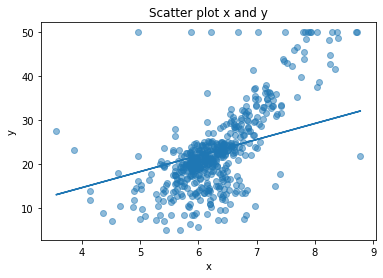

In [64]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### Using SKlearn

In [66]:
from sklearn import linear_model
from sklearn import datasets
data = datasets.load_boston()
  
df = pd.DataFrame(data.data, columns=data.feature_names)

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [67]:
target = pd.DataFrame(data.target, columns=['MEDV'])

In [68]:
X = df
y = target['MEDV']

In [69]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [70]:
predictions = lm.predict(X)
print(predictions)

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

In [71]:
lm.score(X,y)

0.7406426641094095

##### Using SKlearn 2

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [73]:
df.shape

(205, 2)

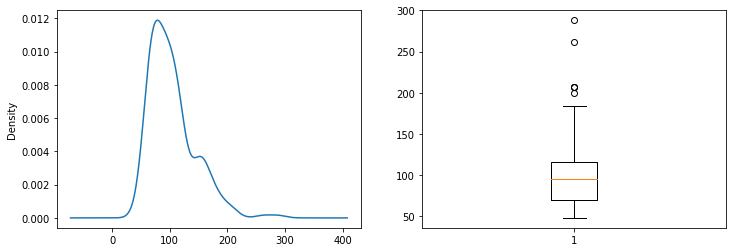

In [74]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1, 2, 2)
plt.boxplot(df['horsepower'])
plt.show()

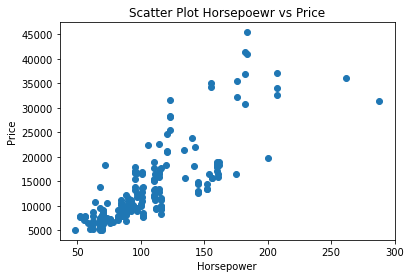

In [75]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepoewr vs Price')
plt.show()

In [76]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [77]:
x = df['horsepower'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [79]:
x_train.shape

(164, 1)

In [80]:
x_test.shape

(41, 1)

In [84]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [85]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[171.50596874]]
[-4489.68542026]


In [86]:
lin_reg.score(x_test, y_test)

0.23184167750406937

Text(0.5, 1.0, 'Plot Horsepower vs Price')

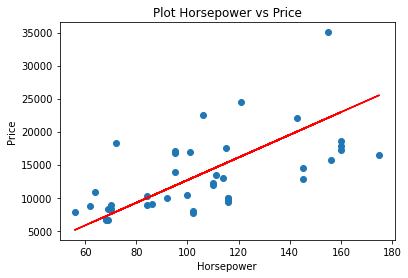

In [87]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [88]:
lin_reg.predict([[100]])

array([[12660.91145392]])

In [89]:
lin_reg.predict([[150]])

array([[21236.209891]])

In [91]:
lin_reg.predict([[200]])

array([[29811.50832809]])